# Credit Card Fraud Detection

`Problem Statement`: The Credit Card Fraud Detection Problem includes modelling past credit card transactions with the knowledge of the ones that turned out to be fraud. This model is then used to identify whether a new transaction is fraudulent or not. Our aim here is to detect 100% of the fraudulent transactions while minimizing the incorrect fraud classifications.<br><br>

`About Data and Source`: The data set includes credit card transactions made by European cardholders over a period of two days in September 2013. The dataset is from Kaggle: https://www.kaggle.com/mlg-ulb/creditcardfraud<br><br>

`Observations`: <br>
• The data set is highly skewed, consisting of 492 frauds in a total of 284,807 observations. This resulted in only 0.172% fraud cases. This skewed set is justified by the low number of fraudulent transactions. <br>
• The dataset consists of numerical values from the 28 ‘Principal Component Analysis (PCA)’ transformed features, namely V1 to V28. Furthermore, there is no metadata about the original features provided, so pre-analysis or feature study could not be done.<br> • The ‘Time’ and ‘Amount’ features are not transformed data. <br>
• There is no missing value in the dataset.<br>

**Steps involved:**
1. Importing Libraries
2. Data loading and Understanding
3. Analysis of the data and missing value treatment
4. Splitting the data into train & test data and Power transformation
5. Model Building with Imbalanced data
    - Logistic Regression
    - Decision Tree
    - Random Forest
    - GaussianNB
6. Class Balancing
7. Model Building
  -  With Oversampling Balanced
      - Logistic Regression
      - Decision Tree
      - Random Forest
      - GaussianNB  
  -  With SMOTE Balanced
      - Logistic Regression
      - Decision Tree
      - Random Forest
      - GaussianNB    
  -  With ADASYN Balanced
      - Logistic Regression
      - Decision Tree
      - Random Forest
      - GaussianNB
8. Conclusion
        
**_Goal_**: To create a model with good Sensitivity and other metrics and also to find top varaibles.

## Step 1. Importing libraries

In [5]:
#Importing libraries

# Basic
import numpy as np
import pandas as pd

# Visulization
import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns
%matplotlib inline

# Pre-processing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV


# Model-Building
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

# Evaluation
from imblearn import over_sampling
from sklearn.metrics import classification_report, confusion_matrix, auc, accuracy_score, recall_score, roc_auc_score
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler, SMOTE
from collections import Counter
from sklearn.metrics import roc_curve, precision_recall_curve, average_precision_score

# Warnings
import warnings
warnings.filterwarnings('ignore')

# Feature Selection
import eli5
from eli5.sklearn import PermutationImportance

## Step 2. Data loading and Understanding

In [6]:
#Loading the data set

df = pd.read_csv("creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [7]:
# Looking into the datatype and count 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [8]:
#Statistical Summary for numeric columns

df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [9]:
# Shape of the data

print("Shape of the dataset is:",df.shape)

Shape of the dataset is: (284807, 31)


## Step 3. Analysis of the data and missing value treatment

In [10]:
# Looking at the percentage of missing values

round(100*(df.isnull().sum()/len(df)),2)

Time      0.0
V1        0.0
V2        0.0
V3        0.0
V4        0.0
V5        0.0
V6        0.0
V7        0.0
V8        0.0
V9        0.0
V10       0.0
V11       0.0
V12       0.0
V13       0.0
V14       0.0
V15       0.0
V16       0.0
V17       0.0
V18       0.0
V19       0.0
V20       0.0
V21       0.0
V22       0.0
V23       0.0
V24       0.0
V25       0.0
V26       0.0
V27       0.0
V28       0.0
Amount    0.0
Class     0.0
dtype: float64

**We can note that there are no missing values present in the data** 

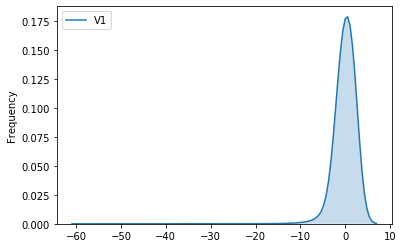

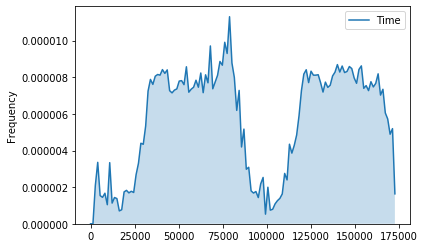

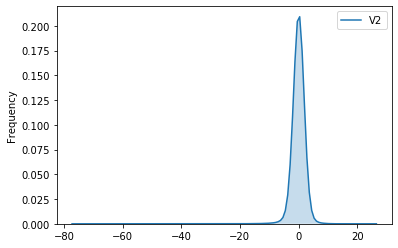

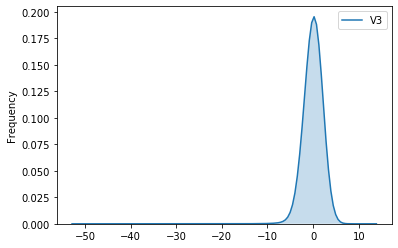

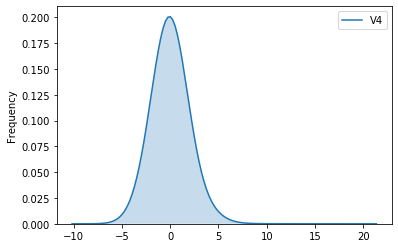

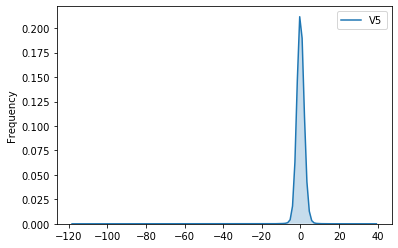

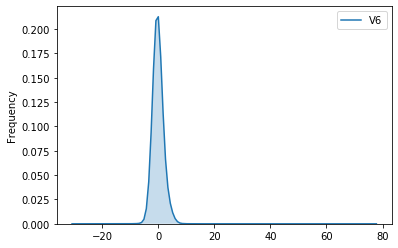

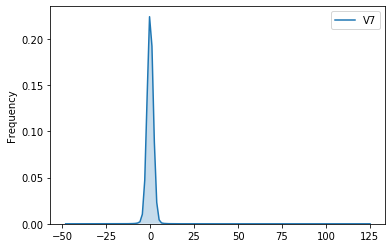

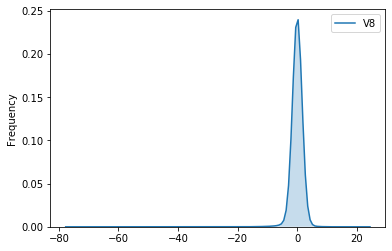

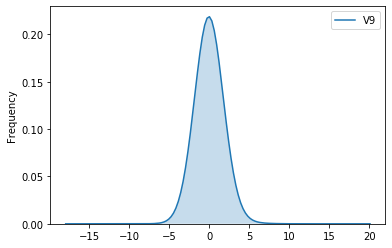

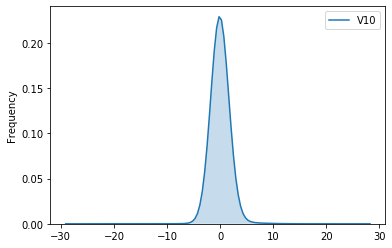

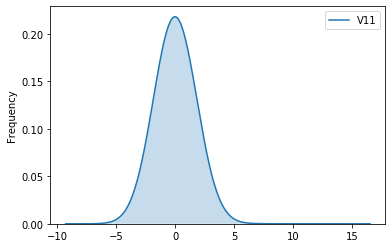

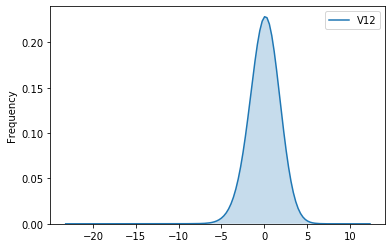

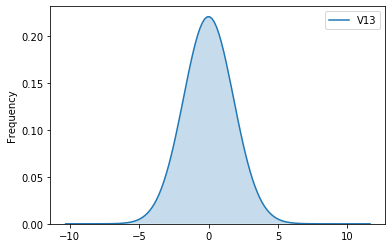

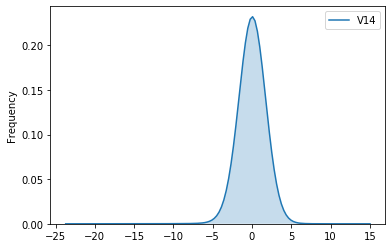

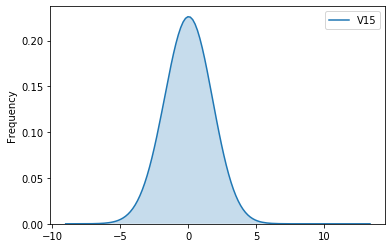

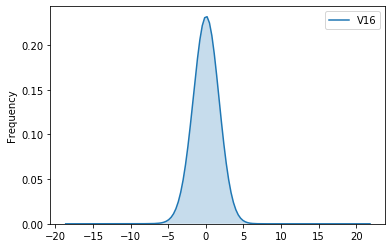

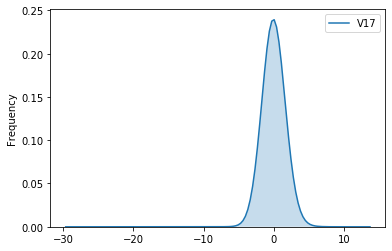

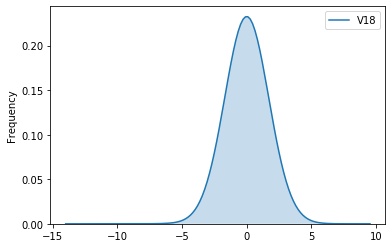

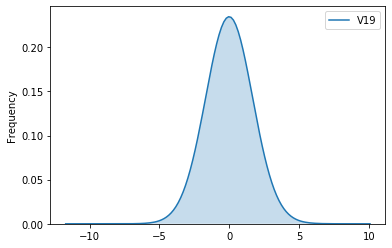

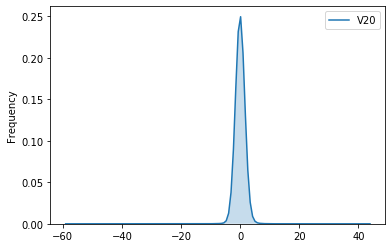

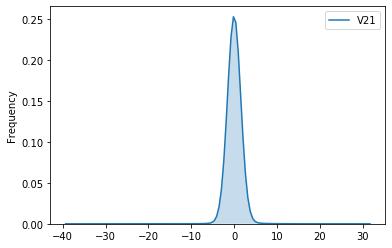

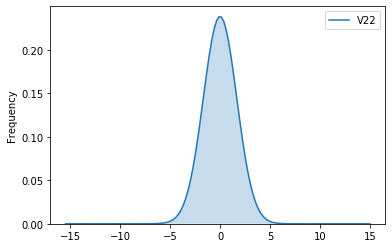

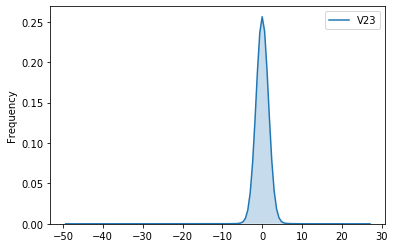

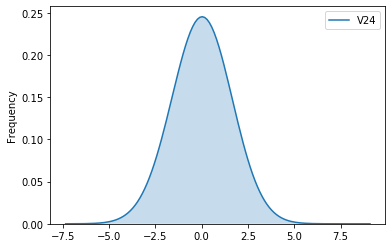

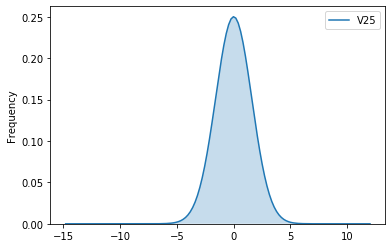

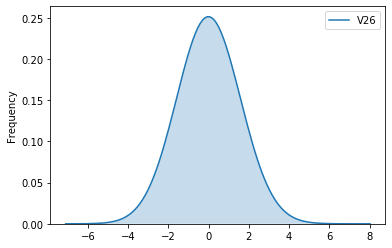

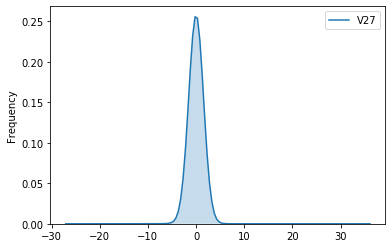

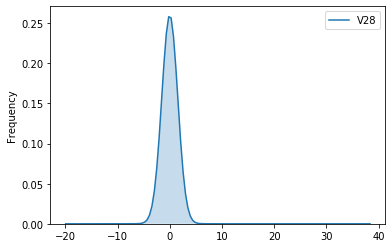

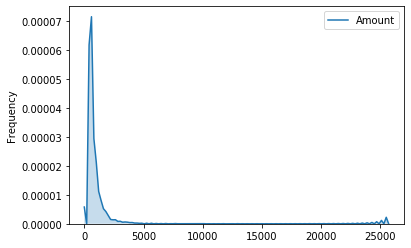

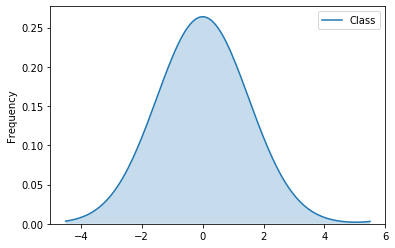

In [11]:
# plotting distribution plot for all the numeric varibales and seeing freqency and Skweness

plt.figure()
for i, col in enumerate(df.columns):
    plt.figure(i)
    sns.kdeplot(df[col],bw=1.5, shade = True)
    plt.ylabel('Frequency')

Here we will observe the distribution of our classes

In [12]:
# Seeing the distribution of the fraud cases

classes=df['Class'].value_counts()
normal_share = round(classes[0]/df['Class'].count()*100,2)
fraud_share = round(classes[1]/df['Class'].count()*100,3)

print("Percentage of Normal Share", normal_share,"%")
print("Percentage of Fraud Share", fraud_share,"%")

Percentage of Normal Share 99.83 %
Percentage of Fraud Share 0.173 %


In [13]:
# Creating a dataframe for Number of prople and Share_Percentage

fraud_lst = pd.DataFrame(df['Class'].value_counts())
total_people = fraud_lst['Class'].sum()
fraud_lst['Share_Percentage'] = round(100*(fraud_lst['Class']/total_people), 2)
fraud_lst.head(2)

# 0: Non_Fraud
# 1: Fraud

,Class,Share_Percentage
0,284315,99.83
1,492,0.17


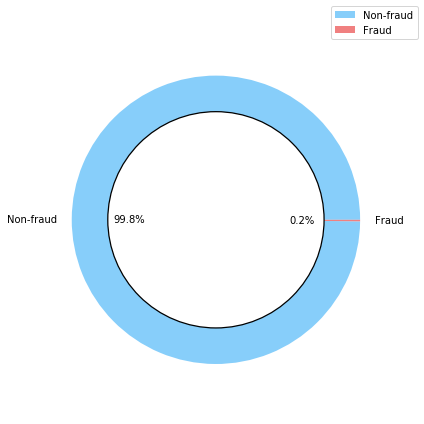

In [14]:
# Plotting Donut chart for the number and percentage of fraudulent vs non-fraudulent transcations

plt.figure(figsize = (6,6))

colors = ['lightskyblue', 'lightcoral'] 

plt.pie(fraud_lst['Share_Percentage'], labels = ['Non-fraud', 'Fraud'], colors = colors, autopct='%1.1f%%')
centre_circle = plt.Circle((0,0), 0.75, color = 'black', fc= 'white', linewidth = 1.25)

fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.axis('equal')
plt.legend(loc = 'center',bbox_to_anchor=(1,1))

plt.tight_layout()

We can see that that percentage of Fraud cases are very less and the data is highly imbalanced<br>
- If we processed with the imbalanced data it will result in overfitting and model will consider that there are no fraud cases, so in the later steps we need to balance it

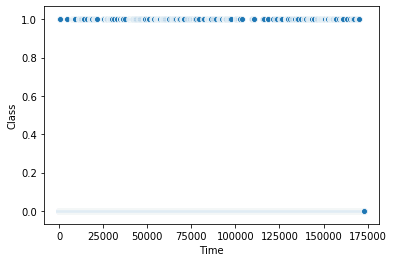

In [15]:
# Creating a scatter plot to observe the distribution of classes with time

sns.scatterplot(y = 'Class', x = 'Time', data = df)
plt.show()

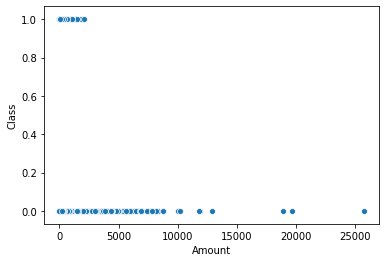

In [16]:
# Creating a scatter plot to observe the distribution of classes with Amount

sns.scatterplot(y = 'Class', x = 'Amount', data = df)
plt.show()

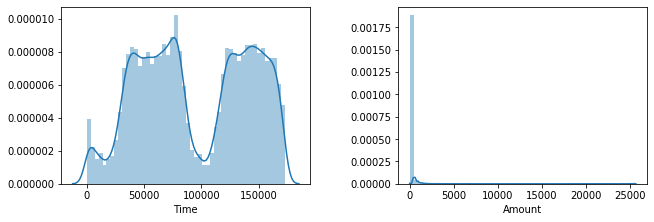

In [17]:
# Let's specifically look at the 2 variables we know

plt.figure(figsize = (10,4))

#Time
plt.subplot(121)
sns.distplot(df['Time'])
# Amount
plt.subplot(122)
sns.distplot(df['Amount'])

plt.tight_layout(pad = 4)
plt.show()

- We can see that the data is not normally distributed and is skeweed, so we need to scale the data

In [18]:
# Data Scaling

from sklearn.preprocessing import StandardScaler

# Creating a new features where we have scaled amount

df['scaled_amount'] = StandardScaler().fit_transform(df['Amount'].values.reshape(-1,1))

In [19]:
# Dropping "Time" and "Amount"

df_1 = df.drop(['Time','Amount'],axis = 1)
df_1.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


- We will be dropping amount as we have scaled it and saved it as scaled amount.
- The ‘Time’ feature does not indicate the actual time of the transaction and is more of a list of the data in chronological order. So we assume that the ‘Time’ feature has little or no significance in classifying a fraud transaction. Therefore, we eliminate this column from further analysis.

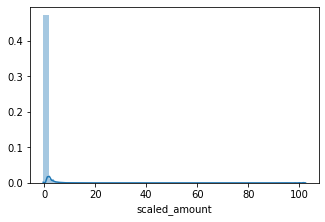

In [20]:
# Let's look at the variables after scaling

plt.figure(figsize = (10,4))

plt.subplot(121)
sns.distplot(df_1['scaled_amount'])

plt.tight_layout(pad = 4)
plt.show()

### Correlation Matrices
Correlation matrices are the essence of understanding our data. We want to know if there are features that influence heavily in whether a specific transaction is a fraud.

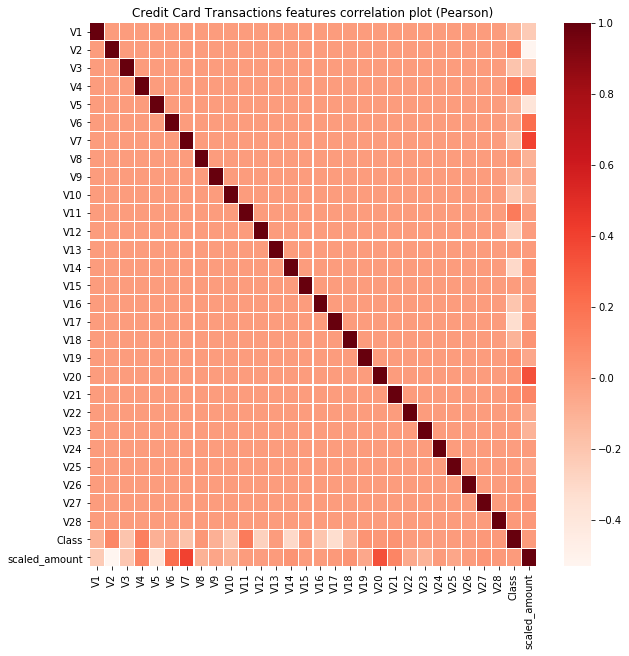

In [21]:
# Features Correlation

plt.figure(figsize = (10,10))

plt.title('Credit Card Transactions features correlation plot (Pearson)')
corr = df_1.corr()

sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, linewidths=.1, cmap="Reds")
plt.show()

## Step 4. Splitting the data into train & test data and Power transformation

In [22]:
# Put all the feature variables in X
X = df_1.drop('Class', axis=1)

# Put the target variable in y
y= df_1['Class']

In [23]:
# Creating training and testing data

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size= 0.7, test_size= 0.3, random_state = 0)

In [24]:
# looking into the distribution of total number of cases for training and testing

print("Total number of Fraud Cases",np.sum(y))
print("Total number of Fraud Cases in training",np.sum(y_train))
print("Total number of Fraud Cases in testing",np.sum(y_test))

Total number of Fraud Cases 492
Total number of Fraud Cases in training 345
Total number of Fraud Cases in testing 147


As there is skewness in the data we will apply PowerTransformer on the dataset. We will take the entire data on train, fit and transform the train and test data.

In [25]:
# Importing "Power Transformer"

from sklearn.preprocessing import PowerTransformer

# Instantiate

pt= PowerTransformer(copy=False)

In [26]:
# Applying transformation on train

pt.fit_transform(X_train)

# Applying transformation on test

pt.transform(X_test)

array([[-0.44104056,  0.66304724, -0.18810682, ...,  0.25707589,
         0.51205027,  0.09573399],
       [-0.45470983,  0.56991707, -0.05129711, ...,  0.17539152,
         0.55643464, -1.00438272],
       [-1.00295267, -1.42039897,  0.08726986, ...,  0.72258842,
         1.35143631,  1.01544965],
       ...,
       [-0.84755683,  0.90865718,  0.17575333, ...,  0.58546045,
        -0.09958984,  0.44906462],
       [-0.59375724,  0.78018419,  1.00795847, ...,  0.87944795,
         0.5344614 , -0.82595122],
       [-0.40386485,  1.28302052, -0.04626962, ...,  0.91932497,
         0.65245578, -0.71265682]])

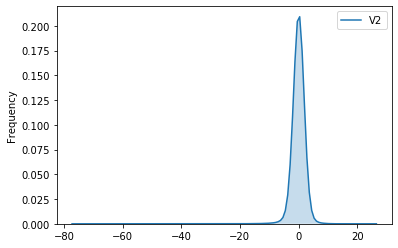

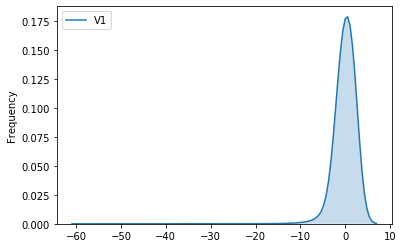

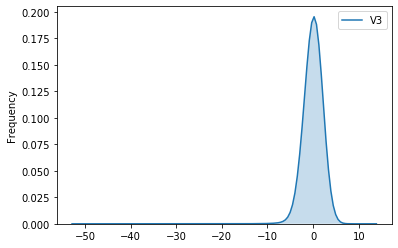

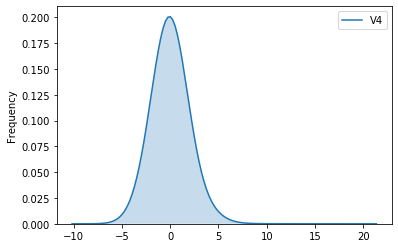

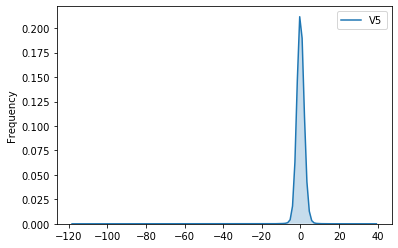

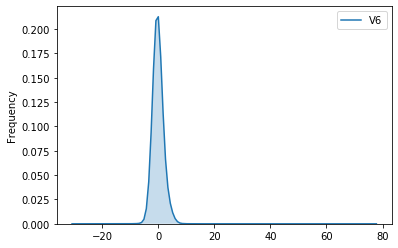

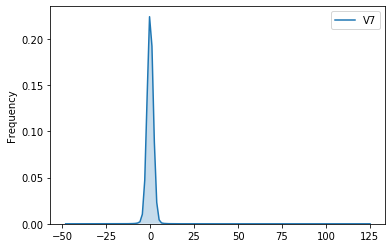

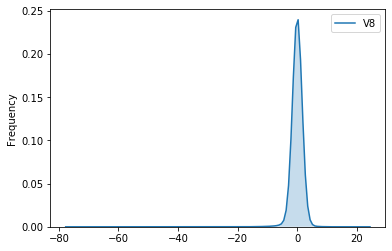

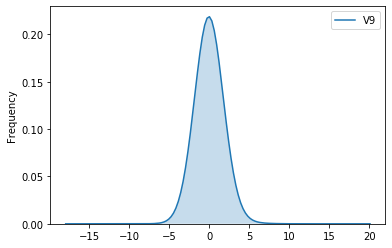

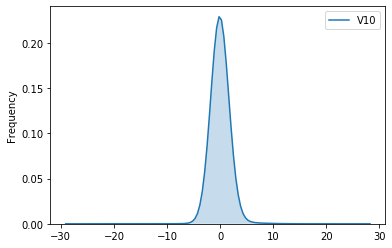

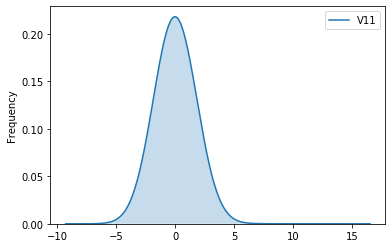

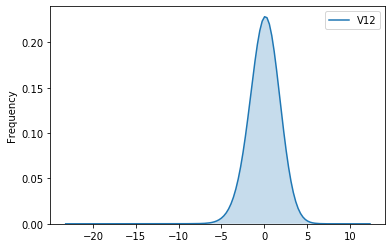

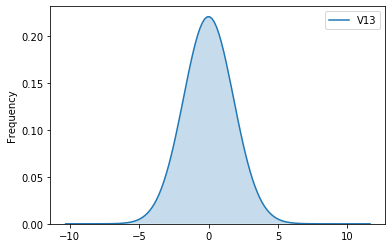

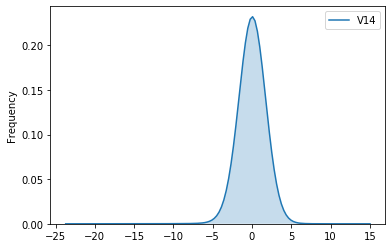

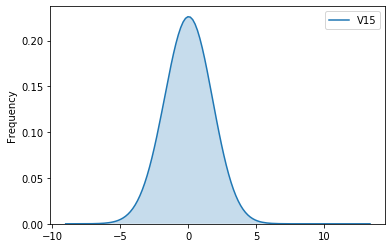

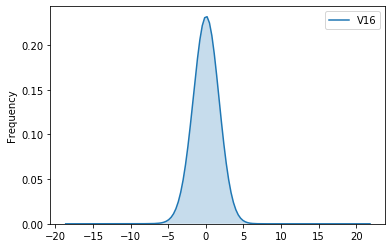

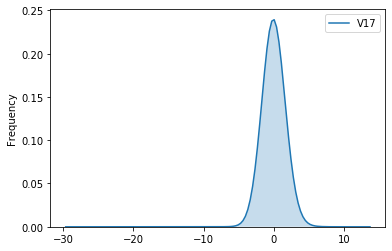

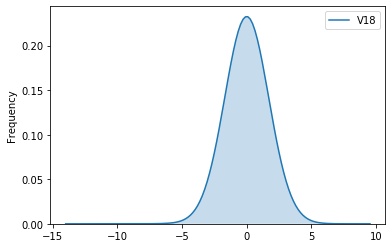

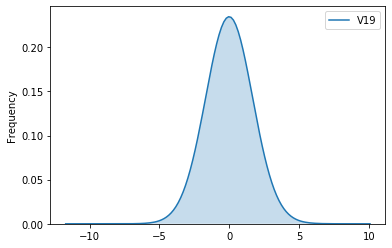

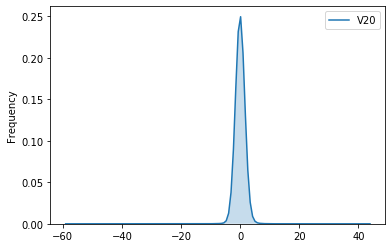

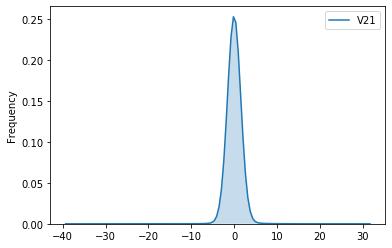

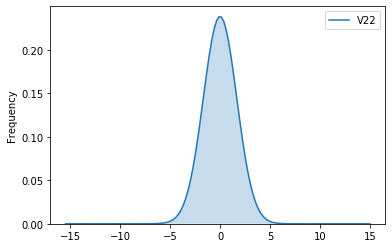

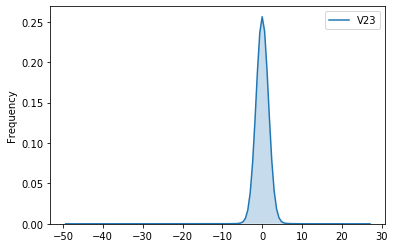

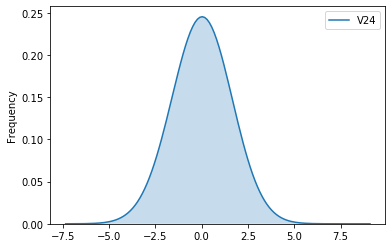

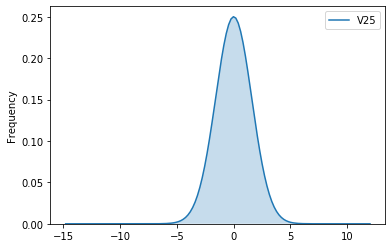

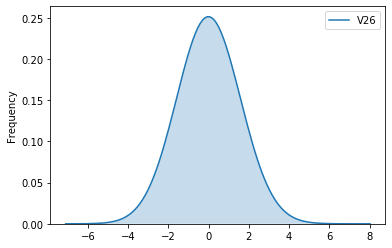

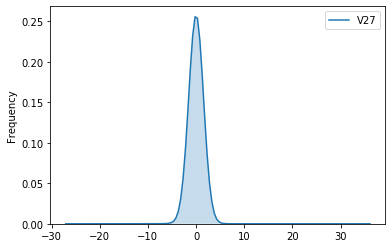

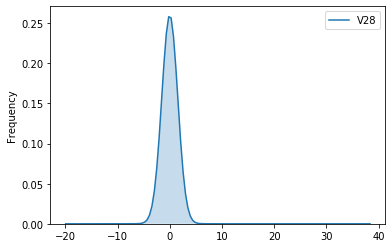

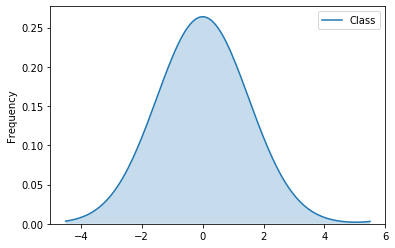

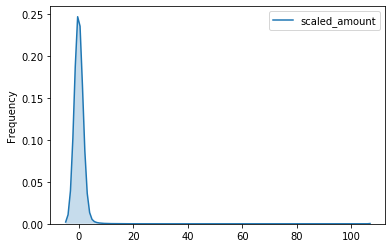

In [27]:
# Checking the distribution of the varaibles

plt.figure()
for i, col in enumerate(df_1.columns):
    plt.figure(i)
    sns.kdeplot(df_1[col],bw=1.5, shade = True)
    plt.ylabel('Frequency')

## Step 5. Model Building
- Build different models on the imbalanced dataset and see the result

### 1. Logistic Regression Model

In [28]:
# Hyperparameter tuning


#Different parameters to check
penalty = ['l1','l2']

    
#Setting the paramters
param_grid = {
            'penalty' : penalty, 
            'C' : [0.1, 1, 10, 100]
            }
             
            
#Setting model
model_1 = LogisticRegression(class_weight='balanced')

## set up randomized for score metric
log_imb = RandomizedSearchCV(estimator = model_1, param_distributions = param_grid, cv = 3, n_jobs = -1, refit='recall_score',
                   return_train_score=True)

#Fitting
log_imb.fit(X_train, y_train)

RandomizedSearchCV(cv=3, estimator=LogisticRegression(class_weight='balanced'),
                   n_jobs=-1,
                   param_distributions={'C': [0.1, 1, 10, 100],
                                        'penalty': ['l1', 'l2']},
                   refit='recall_score', return_train_score=True)

In [30]:
# Looking for the best parameters

print("The best parameters to select are :\n",log_imb.best_params_)

The best parameters to select are :
 {'penalty': 'l2', 'C': 0.1}


In [31]:
# Instantiate
model_1 = LogisticRegression(penalty = 'l2', dual = False, C= 0.1, random_state = 42)

# Fitting
log_model_1 = model_1.fit(X_train, y_train)

In [32]:
# Obtain model predictions
lr_predict = model_1.predict(X_test)

#### Prediction Score:

Accuracy: 99.9204%
Recall: 61.2245%
ROC AUC: 80.6058%


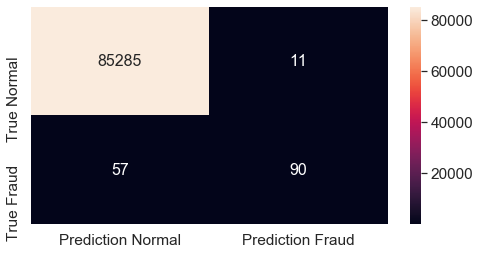

In [33]:
logr_accuracy = accuracy_score(y_test, lr_predict)
logr_recall = recall_score(y_test, lr_predict)
logr_cm = confusion_matrix(y_test, lr_predict)
logr_auc = roc_auc_score(y_test, lr_predict)

print("Accuracy: {:.4%}".format(logr_accuracy))
print("Recall: {:.4%}".format(logr_recall))
print("ROC AUC: {:.4%}".format(logr_auc))

logr_cm = pd.DataFrame(logr_cm, ['True Normal','True Fraud'],['Prediction Normal','Prediction Fraud'])
pyplot.figure(figsize = (8,4))
sns.set(font_scale=1.4)
sns.heatmap(logr_cm, annot=True,annot_kws={"size": 16},fmt='g')

### 2. Decision Tree Model

In [34]:
# Fit a decision tree model to our data
model_2 = DecisionTreeClassifier()

# Hyperparameter Tuning

# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(5, 200, 20),
    'min_samples_split': range(5, 200, 20),
}


dt_imb = RandomizedSearchCV(estimator = model_2, param_distributions = param_grid, refit='recall_score', 
                          cv = 3, verbose = 1, n_jobs = -1, random_state = 0)

# Fit the randomized search to the data
dt_imb.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   52.9s finished


RandomizedSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=-1,
                   param_distributions={'max_depth': range(5, 15, 5),
                                        'min_samples_leaf': range(5, 200, 20),
                                        'min_samples_split': range(5, 200, 20)},
                   random_state=0, refit='recall_score', verbose=1)

In [35]:
# Looking for the best parameters

print("The best parameters to select are :\n",dt_imb.best_params_)

The best parameters to select are :
 {'min_samples_split': 145, 'min_samples_leaf': 5, 'max_depth': 10}


In [36]:
# model with optimal hyperparameters
model_2 = DecisionTreeClassifier(random_state = 42,
                                  max_depth = 10, 
                                  min_samples_leaf = 5,
                                  min_samples_split = 145)

# Fitting
dt_model_2 = model_2.fit(X_train, y_train)

In [38]:
# Obtain model predictions
dt_predict = model_2.predict(X_test)

#### Prediction Score:

Accuracy: 99.9368%
Recall: 80.2721%
ROC AUC: 90.1214%


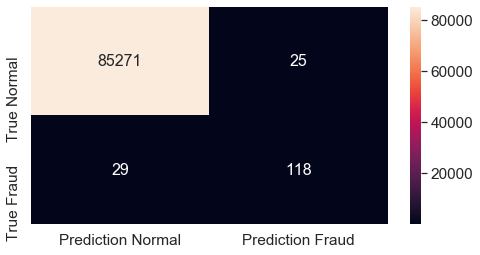

In [39]:
dt_accuracy = accuracy_score(y_test, dt_predict)
dt_recall = recall_score(y_test, dt_predict)
dt_cm = confusion_matrix(y_test, dt_predict)
dt_auc = roc_auc_score(y_test, dt_predict)

print("Accuracy: {:.4%}".format(dt_accuracy))
print("Recall: {:.4%}".format(dt_recall))
print("ROC AUC: {:.4%}".format(dt_auc))

dt_cm = pd.DataFrame(dt_cm, ['True Normal','True Fraud'],['Prediction Normal','Prediction Fraud'])
pyplot.figure(figsize = (8,4))
sns.set(font_scale=1.4)
sns.heatmap(dt_cm, annot=True,annot_kws={"size": 16},fmt='g')

## 3. Random Forest Model

In [40]:
# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier

# Fit a decision tree model to our data
model_3 = RandomForestClassifier( n_jobs = -1)

# Hyperparameter Tuning

# Create the parameter grid based on the results of random search 

param_grid = {'max_depth':[5,6],
                    'criterion':['gini','entropy'],
                    'min_samples_split':range(20,60,100), 
                    'max_features':[5, 10],
                    'min_samples_leaf':range(10,30,50),
                    'n_estimators':[10,20,30,40,50,60,80,100,300]                    
}


# Instantiate the grid search model
rf_imb = RandomizedSearchCV(estimator = model_3, param_distributions = param_grid, refit='recall_score',
                          cv = 3, n_jobs = -1, verbose = 1, random_state = 0 )

# Fit the randomized search to the data
rf_imb.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 14.8min finished


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(n_jobs=-1), n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [5, 6],
                                        'max_features': [5, 10],
                                        'min_samples_leaf': range(10, 30, 50),
                                        'min_samples_split': range(20, 60, 100),
                                        'n_estimators': [10, 20, 30, 40, 50, 60,
                                                         80, 100, 300]},
                   random_state=0, refit='recall_score', verbose=1)

In [41]:
# Looking for the best parameters

print("The best parameters to select are :\n",rf_imb.best_params_)

The best parameters to select are :
 {'n_estimators': 80, 'min_samples_split': 20, 'min_samples_leaf': 10, 'max_features': 10, 'max_depth': 5, 'criterion': 'entropy'}


In [43]:
# model with optimal hyperparameters
model_3 = RandomForestClassifier(random_state = 42,
                                  max_depth = 5, 
                                  min_samples_leaf = 10,
                                  min_samples_split = 20,
                                n_estimators= 80,
                                criterion = 'entropy',
                                max_features = 10)

# Fitting
rf_model_3 = model_3.fit(X_train, y_train)

In [44]:
# Obtain model predictions
rf_predict = model_3.predict(X_test) 

#### Prediction Score:

Accuracy: 99.9497%
Recall: 75.5102%
ROC AUC: 87.7510%


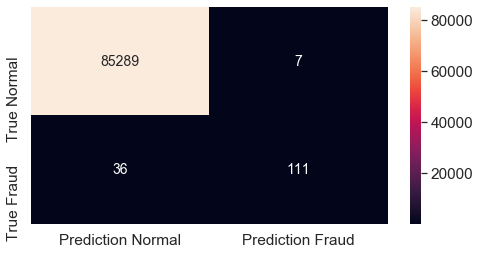

In [45]:
rf_accuracy = accuracy_score(y_test, rf_predict)
rf_recall = recall_score(y_test, rf_predict)
rf_cm = confusion_matrix(y_test, rf_predict)
rf_auc = roc_auc_score(y_test, rf_predict)

print("Accuracy: {:.4%}".format(rf_accuracy))
print("Recall: {:.4%}".format(rf_recall))
print("ROC AUC: {:.4%}".format(rf_auc))

rf_cm = pd.DataFrame(rf_cm, ['True Normal','True Fraud'],['Prediction Normal','Prediction Fraud'])
pyplot.figure(figsize = (8,4))
sns.set(font_scale=1.4)
sns.heatmap(rf_cm, annot=True,annot_kws={"size": 14},fmt='g')

### 4. GaussianNB Model

In [47]:
# Create the parameter grid 
param_grid = {
        'var_smoothing': np.logspace(0,-9, num=100),
}


# Instantiate the model
model_4 = GaussianNB()

gnb_imb= RandomizedSearchCV(estimator = model_4, param_distributions = param_grid, scoring ='roc_auc', 
                          cv = 3, verbose = 1, n_jobs = -1, random_state = 42)

# Fit the randomized search to the data
gnb_imb.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    6.6s finished


RandomizedSearchCV(cv=3, estimator=GaussianNB(), n_jobs=-1,
                   param_distributions={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5.33669923e-02, 4.32876128e-02,
       3.5111917...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])},
                   random_state=42, scoring='roc_auc', verbose=1)

In [48]:
# Looking for the best parameters

print("The best parameters to select are :\n",gnb_imb.best_params_)

The best parameters to select are :
 {'var_smoothing': 1.0}


In [49]:
# Fit a gaussian model to our data

model_4 = GaussianNB(var_smoothing = 1.0)
model_4.fit(X_train, y_train)

# Obtain model predictions
gnb_predict = model_4.predict(X_test)

#### Prediction Score:

Accuracy: 98.9162%
Recall: 68.7075%
ROC AUC: 83.8379%


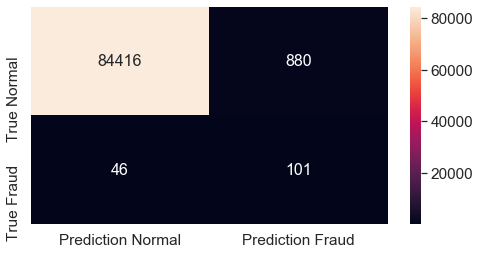

In [50]:
gnb_accuracy = accuracy_score(y_test, gnb_predict)
gnb_recall = recall_score(y_test, gnb_predict)
gnb_cm = confusion_matrix(y_test, gnb_predict)
gnb_auc = roc_auc_score(y_test, gnb_predict)

print("Accuracy: {:.4%}".format(gnb_accuracy))
print("Recall: {:.4%}".format(gnb_recall))
print("ROC AUC: {:.4%}".format(gnb_auc))

gnb_cm = pd.DataFrame(gnb_cm, ['True Normal','True Fraud'],['Prediction Normal','Prediction Fraud'])
pyplot.figure(figsize = (8,4))
sns.set(font_scale=1.4)
sns.heatmap(gnb_cm, annot=True,annot_kws={"size": 16},fmt='g')

## Step 6. Class Balancing

We are going to test diff types of resampling methods: 
- Random undersampling, 
- Random oversampling
- Synthetic Minority Over-sampling (SMOTE). 
- ADAptive SYNthetic (ADASYN)

### 1. Random Undersampling

In this method, we have the choice of selecting fewer data points from the majority class for our model-building process. In case we have only 500 data points in the minority class, we will also have to take 500 data points from the majority class; this will make the classes somewhat balanced. However, in practice, this method is not effective because we will lose over 99% of the original data.

In [51]:
# Fitting Random Undersampling

rusmpl = RandomUnderSampler(sampling_strategy='auto', random_state=0, replacement=False)
X_rusmpl, y_rusmpl = rusmpl.fit_resample(X_train, y_train)

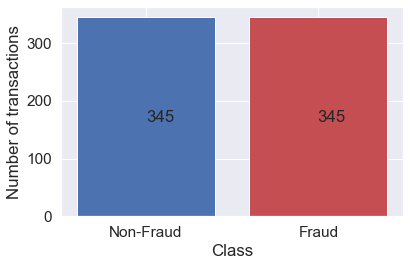

In [52]:
# Checking If classes are balanced:

plt.bar(['Non-Fraud','Fraud'], [Counter(y_rusmpl)[0], Counter(y_rusmpl)[1]], color=['b','r'])
plt.xlabel('Class')
plt.ylabel('Number of transactions')
plt.annotate('{}'.format(Counter(y_rusmpl)[0]), (0.25, 0.45), xycoords='axes fraction')
plt.annotate('{}'.format(Counter(y_rusmpl)[1]), (0.75, 0.45), xycoords='axes fraction')

plt.tight_layout()
plt.show()

- We can note that we have same amount of cases for both fraud and Non-fraud

### 2.  Random Oversampling

Using this method, we can assign weights to randomly chosen data points from the minority class. This way, the occurrence of each data point will be multiplied by the assigned weight, and the machine learning algorithm will now be able to focus on this class while optimising the loss function. However, this method does not add any new information and may even exaggerate the existing information quite a bit

In [53]:
# Fitting Random Oversampling

ros = RandomOverSampler(sampling_strategy='auto', random_state=0)
X_train_ros, y_train_ros = ros.fit_resample(X_train, y_train)

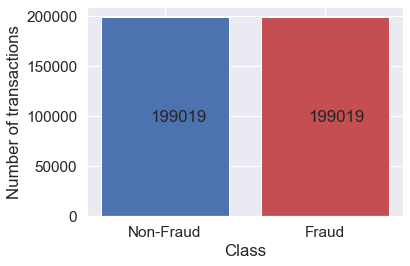

In [54]:
# Checking If classes are balanced:
plt.bar(['Non-Fraud','Fraud'], [Counter(y_train_ros)[0], Counter(y_train_ros)[1]], color=['b','r'])
plt.xlabel('Class')
plt.ylabel('Number of transactions')
plt.annotate('{}'.format(Counter(y_train_ros)[0]), (0.20, 0.45), xycoords='axes fraction')
plt.annotate('{}'.format(Counter(y_train_ros)[1]), (0.70, 0.45), xycoords='axes fraction')

plt.tight_layout()
plt.show()

- We can note that we have same amount of cases for both fraud and Non-fraud

### 3. Synthetic Minority Over-sampling (SMOTE)

It consists of synthesizing elements for the minority class using the existing ones. It randomly chooses a point from the minority class and computes the k-nearest neighbors (default = 5) for this point. The synthetic points are added between the chosen point and its neighbors by choosing a factor between 0 and 1 to multiply the distance. This process can be seen below.

In [55]:
# Fitting SMOTE

smote = SMOTE(sampling_strategy='auto', random_state=0)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

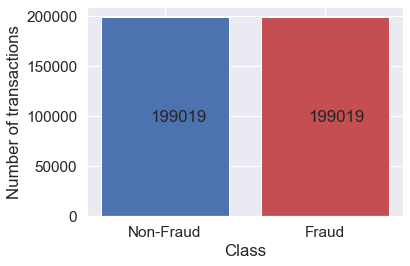

In [56]:
# Checking If classes are balanced:

plt.bar(['Non-Fraud','Fraud'], [Counter(y_train_smote)[0], Counter(y_train_smote)[1]], color=['b','r'])
plt.xlabel('Class')
plt.ylabel('Number of transactions')
plt.annotate('{}'.format(Counter(y_train_smote)[0]), (0.20, 0.45), xycoords='axes fraction')
plt.annotate('{}'.format(Counter(y_train_smote)[1]), (0.70, 0.45), xycoords='axes fraction')

plt.tight_layout()
plt.show()

- We can note that we have same amount of cases for both fraud and Non-fraud

### 4. ADASYN Balanced data

In [57]:
ada = over_sampling.ADASYN(sampling_strategy='auto', random_state=0)
X_train_ada, y_train_ada = ada.fit_resample(X_train, y_train)

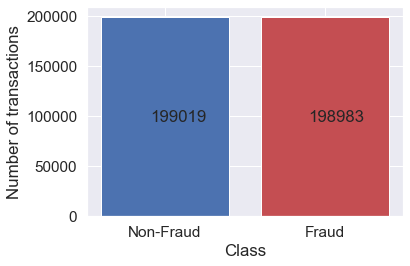

In [58]:
# Checking If classes are balanced:

plt.bar(['Non-Fraud','Fraud'], [Counter(y_train_ada)[0], Counter(y_train_ada)[1]], color=['b','r'])
plt.xlabel('Class')
plt.ylabel('Number of transactions')
plt.annotate('{}'.format(Counter(y_train_ada)[0]), (0.20, 0.45), xycoords='axes fraction')
plt.annotate('{}'.format(Counter(y_train_ada)[1]), (0.70, 0.45), xycoords='axes fraction')

plt.tight_layout()
plt.show()

- We can note that we have same amount of cases for both fraud and Non-fraud.

## Step 7. Model Building with Balanced Data

### Model Building with Oversampling Balanced data

#### Preprocessing for Oversampling data

In [59]:
# Storing the column names  for train and test

X_train_col = X_train_ros.columns

X_test_col = X_test.columns

In [60]:
# We will convert the data into array as it will optimize more

X_train_ros, y_train_ros = np.array(X_train_ros), np.array(y_train_ros)

In [61]:
#Instantiate
scaler = StandardScaler()

# Scaling train dataset

X_train_ros = scaler.fit_transform(X_train_ros)
X_train_ros = pd.DataFrame(X_train_ros, columns = X_train_col)
X_train_ros.shape

(398038, 29)

In [62]:
# Scaling test data-set

X_test = scaler.transform(X_test)
X_test = pd.DataFrame(X_test, columns = X_test_col)

X_test.shape

(85443, 29)

#### 1. Logistic Regression

In [63]:
# Hyperparameter tuning


#Different parameters to check
penalty = ['l1','l2']

    
#Setting the paramters
param_grid = {
            'penalty' : penalty, 
            'C' : [0.1, 1, 10, 100]
            }
             
            
#Setting model
log_reg = LogisticRegression(class_weight='balanced')

## set up randomized for score metric
lr_rsearch = RandomizedSearchCV(estimator = log_reg, param_distributions = param_grid, cv = 3, n_jobs = -1, refit='recall_score',
                   return_train_score=True)

#Fitting
lr_rsearch.fit(X_train_ros, y_train_ros)

RandomizedSearchCV(cv=3, estimator=LogisticRegression(class_weight='balanced'),
                   n_jobs=-1,
                   param_distributions={'C': [0.1, 1, 10, 100],
                                        'penalty': ['l1', 'l2']},
                   refit='recall_score', return_train_score=True)

In [64]:
# Finding the best parameters

print("The best parameters to select are :\n",lr_rsearch.best_params_)

The best parameters to select are :
 {'penalty': 'l2', 'C': 0.1}


In [65]:
# Finding the best parameters

print("Mean cross-validated score of the best_estimator :\n",round(lr_rsearch.best_score_,2))

Mean cross-validated score of the best_estimator :
 0.95


In [66]:
# Instantiate
log = LogisticRegression(penalty = 'l2', C= 0.1)

# Fitting
log_model = log.fit(X_train_ros, y_train_ros)

In [67]:
# Making Predcition on test set

test_pred_prob = log_model.predict_proba(X_test)

In [68]:
# Looking into area under the curve for train dataset

from sklearn import metrics

print("Area under ROC curve for test dataset {:2.2}".format(metrics.roc_auc_score(y_test, test_pred_prob[:,1]) ) )

Area under ROC curve for test dataset 0.98


In [69]:
# Predicting for test data

y_pred = log_model.predict(X_test)

In [70]:
# Creating confusion matrix
confusion = metrics.confusion_matrix(y_test, y_pred)
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [71]:
#Looking into accuracy, sensitivity, precision and Specificity

print('Accuracy : {:2.2}'.format(metrics.accuracy_score(y_test, y_pred)))
print('Sensitivity/Recall : {:2.2}'.format(metrics.recall_score(y_test, y_pred)))
print('Precision : {:2.2}'.format(metrics.precision_score(y_test, y_pred)))
print('F1 Score : {:2.2}'.format(metrics.f1_score(y_test, y_pred)))
print("Specificity : {:2.2}".format(TN/(TN+FP)))

Accuracy : 0.98
Sensitivity/Recall : 0.91
Precision : 0.061
F1 Score : 0.11
Specificity : 0.98


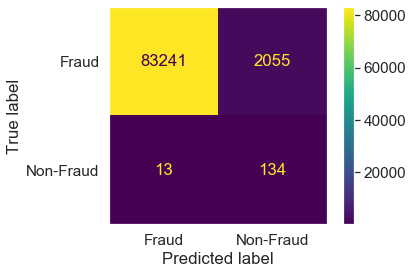

In [72]:
# Plotting Confusion Matrics
plt.rcParams["axes.grid"] = False

metrics.plot_confusion_matrix(log_model, X_test, y_test, values_format = 'n',
                                    display_labels = ['Fraud', 'Non-Fraud'])
plt.show()

In [73]:
# Let's see the important parameters

prem = PermutationImportance(estimator = log_model, random_state = 0)
prem.fit(X_train, y_train)

PermutationImportance(estimator=LogisticRegression(C=0.1), random_state=0)

In [74]:
eli5.show_weights(estimator = prem, feature_names = X_test.columns.tolist())

Weight,Feature
0.0009 ± 0.0001,V6
0.0004 ± 0.0001,V2
0.0003 ± 0.0002,V22
0.0002 ± 0.0001,V21
0.0002 ± 0.0000,V28
0.0002 ± 0.0001,V13
0.0001 ± 0.0001,scaled_amount
0.0001 ± 0.0000,V1
0.0001 ± 0.0000,V24
-0.0000 ± 0.0000,V20


#### 2. Decision Tree

In [75]:
# Hyperparameter Tuning

# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(5, 200, 20),
    'min_samples_split': range(5, 200, 20),
}


# Instantiate the model
dec_tree = DecisionTreeClassifier()

dt_rsearch = RandomizedSearchCV(estimator = dec_tree, param_distributions = param_grid, refit='recall_score', 
                          cv = 3, verbose = 1, n_jobs = -1, random_state = 0)

# Fit the randomized search to the data
dt_rsearch.fit(X_train_ros, y_train_ros)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   59.2s finished


RandomizedSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=-1,
                   param_distributions={'max_depth': range(5, 15, 5),
                                        'min_samples_leaf': range(5, 200, 20),
                                        'min_samples_split': range(5, 200, 20)},
                   random_state=0, refit='recall_score', verbose=1)

In [76]:
# Looking for the best parameters

print("The best parameters to select are :\n",dt_rsearch.best_params_)

The best parameters to select are :
 {'min_samples_split': 145, 'min_samples_leaf': 5, 'max_depth': 10}


In [77]:
# Finding the best parameters

print("Mean cross-validated score of the best_estimator :\n",round(dt_rsearch.best_score_,2))

Mean cross-validated score of the best_estimator :
 1.0


In [78]:
# model with optimal hyperparameters

clf_gini = DecisionTreeClassifier(random_state = 0,
                                  max_depth=10, 
                                  min_samples_leaf=145,
                                  min_samples_split=5)
clf_gini.fit(X_train_ros, y_train_ros)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=145, min_samples_split=5,
                       random_state=0)

In [80]:
y_pred_default = clf_gini.predict(X_test)

confusion_tree_hp=confusion_matrix(y_test,y_pred_default)
confusion_tree_hp

array([[84501,   795],
       [   24,   123]], dtype=int64)

In [81]:
TP = confusion_tree_hp[1,1] # true positive 
TN = confusion_tree_hp[0,0] # true negatives
FP = confusion_tree_hp[0,1] # false positives
FN = confusion_tree_hp[1,0] # false negatives

# Let's see the sensitivity 
print('Sensitivity: ', round(TP / float(TP+FN),2))

# Let us calculate specificity
print('Specificity: ',round(TN / float(TN+FP),2))

# Calculate false postive rate 
print('False postive rate: ',round(FP/ float(TN+FP),2))

# positive predictive value 
print('Positive predictive value: ', round(TP / float(TP+FP),2))

# Negative predictive value
print('Negative predictive value: ',round(TN / float(TN+ FN),2))

## Misclassification rate

print('Misclassification Rate: ',round((FN+FP)/(TP+TN+FP+FN),2))
print('F1 Score : {:2.2}'.format(metrics.f1_score(y_test, y_pred_default)))


Sensitivity:  0.84
Specificity:  0.99
False postive rate:  0.01
Positive predictive value:  0.13
Negative predictive value:  1.0
Misclassification Rate:  0.01
F1 Score : 0.23


In [82]:
# Let's see the important parameters

prem = PermutationImportance(estimator = clf_gini, random_state = 0)
prem.fit(X_train, y_train)

PermutationImportance(estimator=DecisionTreeClassifier(max_depth=10,
                                                       min_samples_leaf=145,
                                                       min_samples_split=5,
                                                       random_state=0),
                      random_state=0)

In [83]:
eli5.show_weights(estimator = prem, feature_names = X_test.columns.tolist())

Weight,Feature
0.0111 ± 0.0011,V14
0.0035 ± 0.0002,V13
0.0019 ± 0.0002,V7
0.0013 ± 0.0003,V20
0.0011 ± 0.0003,V3
0.0010 ± 0.0002,V16
0.0008 ± 0.0005,V21
0.0006 ± 0.0002,scaled_amount
0.0004 ± 0.0002,V26
0.0002 ± 0.0001,V25


#### 3. Random Forest

In [84]:
# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier

# Hyperparameter Tuning

# Create the parameter grid based on the results of random search 

param_grid = {'max_depth':[4,8,10],
                    'criterion':['gini','entropy'],
                    'min_samples_split':[2,3,5,7,9], 
                    'max_features':[5, 10],
                    'min_samples_leaf':[1, 10, 25, 50, 75, 100],
                    'n_estimators':[10,20,30,40,50,60,80,100,300]                    
}

# Create a based model
rf = RandomForestClassifier(class_weight='balanced')

# Instantiate the grid search model
rf_search = RandomizedSearchCV(estimator = rf, param_distributions = param_grid, refit='recall_score',
                          cv = 3, n_jobs = -1, verbose = 1, random_state = 0 )

# Fit the randomized search to the data
rf_search.fit(X_train_ros, y_train_ros)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 13.4min finished


RandomizedSearchCV(cv=3,
                   estimator=RandomForestClassifier(class_weight='balanced'),
                   n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [4, 8, 10],
                                        'max_features': [5, 10],
                                        'min_samples_leaf': [1, 10, 25, 50, 75,
                                                             100],
                                        'min_samples_split': [2, 3, 5, 7, 9],
                                        'n_estimators': [10, 20, 30, 40, 50, 60,
                                                         80, 100, 300]},
                   random_state=0, refit='recall_score', verbose=1)

In [85]:
# Looking for the best parameters

print("The best parameters to select are :\n",rf_search.best_params_)

The best parameters to select are :
 {'n_estimators': 60, 'min_samples_split': 7, 'min_samples_leaf': 1, 'max_features': 5, 'max_depth': 10, 'criterion': 'entropy'}


In [86]:
print("Mean cross-validated score of the best_estimator :\n",round(rf_search.best_score_,2))

Mean cross-validated score of the best_estimator :
 1.0


In [87]:
# model with optimal hyperparameters

rfc = RandomForestClassifier(bootstrap=True,
                             class_weight='balanced',
                             criterion = 'entropy',
                             max_depth=10,
                             max_features=5,
                             min_samples_leaf=1,
                             min_samples_split=7,
                             n_estimators=60,
                             n_jobs = -1, random_state = 0)
# fit
rfc.fit(X_train_ros, y_train_ros)

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=10, max_features=5, min_samples_split=7,
                       n_estimators=60, n_jobs=-1, random_state=0)

In [89]:
y_pred_default_ =rfc.predict(X_test)

confusion_tree_rf=confusion_matrix(y_test,y_pred_default_)
confusion_tree_rf

array([[85269,    27],
       [   29,   118]], dtype=int64)

In [90]:
TP = confusion_tree_rf[1,1] # true positive 
TN = confusion_tree_rf[0,0] # true negatives
FP = confusion_tree_rf[0,1] # false positives
FN = confusion_tree_rf[1,0] # false negatives

# Let's see the sensitivity 
print('Sensitivity: ', round(TP / float(TP+FN),2))

# Let us calculate specificity
print('Specificity: ',round(TN / float(TN+FP),2))

# Calculate false postive rate 
print('False postive rate: ',round(FP/ float(TN+FP),2))

# positive predictive value 
print('Positive predictive value: ', round(TP / float(TP+FP),2))

# Negative predictive value
print('Negative predictive value: ',round(TN / float(TN+ FN),2))

## Misclassification rate

print('Misclassification Rate: ',round((FN+FP)/(TP+TN+FP+FN),2))


Sensitivity:  0.8
Specificity:  1.0
False postive rate:  0.0
Positive predictive value:  0.81
Negative predictive value:  1.0
Misclassification Rate:  0.0


In [91]:
# Let's see the important parameters

prem_rf = PermutationImportance(estimator = rf_search, random_state = 0)
prem_rf.fit(X_train, y_train)

PermutationImportance(estimator=RandomizedSearchCV(cv=3,
                                                   estimator=RandomForestClassifier(class_weight='balanced'),
                                                   n_jobs=-1,
                                                   param_distributions={'criterion': ['gini',
                                                                                      'entropy'],
                                                                        'max_depth': [4,
                                                                                      8,
                                                                                      10],
                                                                        'max_features': [5,
                                                                                         10],
                                                                        'min_samples_leaf': [1,
                            

In [92]:
eli5.show_weights(estimator = prem_rf, feature_names = X_test.columns.tolist())

Weight,Feature
0.0512 ± 0.0004,V12
0.0247 ± 0.0007,V14
0.0197 ± 0.0007,V11
0.0148 ± 0.0005,V17
0.0055 ± 0.0001,V16
0.0032 ± 0.0003,V3
0.0027 ± 0.0001,V7
0.0012 ± 0.0003,V21
0.0010 ± 0.0002,V15
0.0005 ± 0.0000,V24


#### 4. GaussianNB

In [93]:
# Create the parameter grid 
param_grid = {
        'var_smoothing': np.logspace(0,-9, num=100),
}


# Instantiate the model
gaussain_nb = GaussianNB()

gnb_rsearch = RandomizedSearchCV(estimator = gaussain_nb, param_distributions = param_grid, refit='recall_score', 
                          cv = 3, verbose = 1, n_jobs = -1, random_state = 0)

# Fit the randomized search to the data
gnb_rsearch.fit(X_train_ros, y_train_ros)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   11.5s finished


RandomizedSearchCV(cv=3, estimator=GaussianNB(), n_jobs=-1,
                   param_distributions={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5.33669923e-02, 4.32876128e-02,
       3.5111917...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])},
                   random_state=0, refit='recall_score', verbose=1)

In [94]:
# Looking for the best parameters

print("The best parameters to select are :\n",gnb_rsearch.best_params_)

The best parameters to select are :
 {'var_smoothing': 1.2328467394420658e-05}


In [95]:
print("Mean cross-validated score of the best_estimator :\n",round(gnb_rsearch.best_score_,2))

Mean cross-validated score of the best_estimator :
 0.92


In [96]:
# Model with optimal hyperparameters

gaussain_nb = GaussianNB(var_smoothing = 1.232)
gaussain_nb.fit(X_train_ros, y_train_ros)

GaussianNB(var_smoothing=1.232)

In [97]:
# accuracy score

gaussain_nb.score(X_test, y_test)

0.9959973315543695

In [98]:
y_pred_default = gaussain_nb.predict(X_test)

confusion_tree_hp=confusion_matrix(y_test, y_pred_default)
confusion_tree_hp

array([[85027,   269],
       [   73,    74]], dtype=int64)

In [99]:
TP = confusion_tree_hp[1,1] # true positive 
TN = confusion_tree_hp[0,0] # true negatives
FP = confusion_tree_hp[0,1] # false positives
FN = confusion_tree_hp[1,0] # false negatives

# Let's see the sensitivity 
print('Sensitivity: ', round(TP / float(TP+FN),2))

# Let us calculate specificity
print('Specificity: ',round(TN / float(TN+FP),2))

# Calculate false postive rate -
print('False postive rate: ',round(FP/ float(TN+FP),2))

# positive predictive value 
print('Positive predictive value: ', round(TP / float(TP+FP),2))

# Negative predictive value
print('Negative predictive value: ',round(TN / float(TN+ FN),2))

## Misclassification rate

print('Misclassification Rate: ',round((FN+FP)/(TP+TN+FP+FN),2))


Sensitivity:  0.5
Specificity:  1.0
False postive rate:  0.0
Positive predictive value:  0.22
Negative predictive value:  1.0
Misclassification Rate:  0.0


In [100]:
# Let's see the important parameters

prem = PermutationImportance(estimator = gaussain_nb, random_state = 0)
prem.fit(X_train, y_train)

PermutationImportance(estimator=GaussianNB(var_smoothing=1.232), random_state=0)

In [101]:
eli5.show_weights(estimator = prem, feature_names = X_test.columns.tolist())

Weight,Feature
0.0110 ± 0.0003,V17
0.0095 ± 0.0006,V14
0.0074 ± 0.0003,V7
0.0070 ± 0.0003,V10
0.0063 ± 0.0006,V11
0.0062 ± 0.0003,V12
0.0055 ± 0.0004,V3
0.0048 ± 0.0003,V4
0.0043 ± 0.0002,V8
0.0043 ± 0.0004,V2


### Model Building with SMOTE Balanced data

#### Preprocessing

In [102]:
# Storing the column names  for train and test
X_train_col = X_train_smote.columns

X_test_col = X_test.columns

In [103]:
# We will convert the data into array as it will optimize more

X_train_smote, y_train_smote = np.array(X_train_smote), np.array(y_train_smote)

In [104]:
#Instantiate
scaler = StandardScaler()

# Scaling train dataset
X_train_smote = scaler.fit_transform(X_train_smote)
X_train_smote = pd.DataFrame(X_train_smote, columns = X_train_col)
X_train_smote.shape

(398038, 29)

In [105]:
# Scaling test data-set

X_test = scaler.transform(X_test)
X_test = pd.DataFrame(X_test, columns = X_test_col)

X_test.shape

(85443, 29)

#### 1. Logistic Regression

In [106]:
# Hyperparameter tuning

#Different parameters to check
penalty = ['l1','l2']

C_param_range = [0.1,1,10,100]
    
#Setting the paramters
param_grid = dict(C = C_param_range, penalty = penalty )

#Setting model
log_reg = LogisticRegression(n_jobs = -1, random_state = 0)

## set up randomized for score metric
lr_rsearch = RandomizedSearchCV(estimator = log_reg, param_distributions = param_grid, cv = 3, n_jobs = -1,
                                refit='recall_score', return_train_score=True)

#Fitting
lr_rsearch.fit(X_train_smote, y_train_smote)

RandomizedSearchCV(cv=3,
                   estimator=LogisticRegression(n_jobs=-1, random_state=0),
                   n_jobs=-1,
                   param_distributions={'C': [0.1, 1, 10, 100],
                                        'penalty': ['l1', 'l2']},
                   refit='recall_score', return_train_score=True)

In [107]:
# Looking for the best parameters

print("The best parameters to select are :\n",lr_rsearch.best_params_)

The best parameters to select are :
 {'penalty': 'l2', 'C': 100}


In [108]:
print("Mean cross-validated score of the best_estimator :\n",round(lr_rsearch.best_score_,2))

Mean cross-validated score of the best_estimator :
 0.95


In [109]:
# Instantiate
log = LogisticRegression(penalty = 'l2', C= 100, random_state = 0)

# Fitting
log_model = log.fit(X_train_smote, y_train_smote)

In [110]:
# Making Predcition on test set

test_pred_prob = log_model.predict_proba(X_test)

In [111]:
# Looking into area under the curve for train dataset

from sklearn import metrics

print("Area under ROC curve for test dataset {:2.2}".format(metrics.roc_auc_score(y_test, test_pred_prob[:,1]) ) )

Area under ROC curve for test dataset 0.98


In [112]:
# Predicting for test data

y_pred = log_model.predict(X_test)

In [113]:
# Creating confusion matrix
confusion = metrics.confusion_matrix(y_test, y_pred)

In [114]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [115]:
#Looking into accuracy, sensitivity, precision and Specificity

print('Accuracy : {:2.2}'.format(metrics.accuracy_score(y_test, y_pred)))
print('Sensitivity/Recall : {:2.2}'.format(metrics.recall_score(y_test, y_pred)))
print('Precision : {:2.2}'.format(metrics.precision_score(y_test, y_pred)))
print('F1 Score : {:2.2}'.format(metrics.f1_score(y_test, y_pred)))
print("Specificity : {:2.2}".format(TN/(TN+FP)))

Accuracy : 1.0
Sensitivity/Recall : 0.56
Precision : 0.88
F1 Score : 0.68
Specificity : 1.0


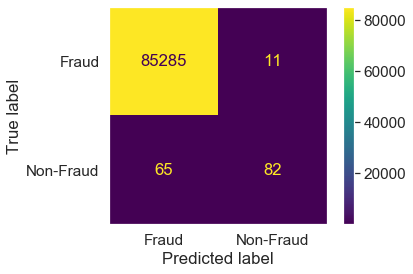

In [116]:
# Plotting Confusion Matrics

plt.rcParams["axes.grid"] = False

metrics.plot_confusion_matrix(log_model, X_test, y_test, values_format = 'n',
                                    display_labels = ['Fraud', 'Non-Fraud'])
plt.show()

In [117]:
# Let's see the important parameters

prem = PermutationImportance(estimator = log_model, random_state = 0)
prem.fit(X_train, y_train)

PermutationImportance(estimator=LogisticRegression(C=100, random_state=0),
                      random_state=0)

In [118]:
eli5.show_weights(estimator = prem, feature_names = X_test.columns.tolist())

Weight,Feature
0.0012 ± 0.0001,V1
0.0009 ± 0.0001,V6
0.0003 ± 0.0002,V13
0.0002 ± 0.0001,V22
0.0001 ± 0.0000,V21
0.0001 ± 0.0002,scaled_amount
0.0001 ± 0.0001,V28
0.0000 ± 0.0000,V3
0.0000 ± 0.0001,V27
0 ± 0.0000,V2


#### 2. Decision Tree

In [119]:
# Fitting the decision tree with default hyperparameters, apart from max_depth which is 5 so that we can plot and read the tree.

dt= DecisionTreeClassifier(max_depth=5)
dt.fit(X_train_smote, y_train_smote)

DecisionTreeClassifier(max_depth=5)

In [120]:
# Making predictions
y_pred_dt = dt.predict(X_test)

In [121]:
# Printing classification report
print('Classification Report:', classification_report(y_test, y_pred_dt))
print('Accuracy Score:', accuracy_score(y_test,y_pred_dt))

Classification Report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.43      0.35      0.38       147

    accuracy                           1.00     85443
   macro avg       0.71      0.67      0.69     85443
weighted avg       1.00      1.00      1.00     85443

Accuracy Score: 0.9980805917395222


In [122]:
confusion_tree = confusion_matrix(y_test,y_pred_dt)

TP = confusion_tree[1,1] # true positive 
TN = confusion_tree[0,0] # true negatives
FP = confusion_tree[0,1] # false positives
FN = confusion_tree[1,0] # false negatives

# Let's see the sensitivity 
print('Sensitivity: ', round(TP / float(TP+FN),2))

# Let us calculate specificity
print('Specificity: ',round(TN / float(TN+FP),2))

# Calculate false postive rate -
print('False postive rate: ',round(FP/ float(TN+FP),2))

# positive predictive value 
print('Positive predictive value: ', round(TP / float(TP+FP),2))

# Negative predictive value
print('Negative predictive value: ',round(TN / float(TN+ FN),2))

## Misclassification rate

print('Misclassification Rate: ',round((FN+FP)/(TP+TN+FP+FN),2))

Sensitivity:  0.35
Specificity:  1.0
False postive rate:  0.0
Positive predictive value:  0.43
Negative predictive value:  1.0
Misclassification Rate:  0.0


##### Grid Search to Find Optimal Hyperparameters

In [123]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(5, 200, 20),
    'min_samples_split': range(5, 200, 20),
    'criterion': ["entropy", "gini"]
}


# Instantiate the model
dec_tree = DecisionTreeClassifier()

dt_rsearch = RandomizedSearchCV(estimator = dec_tree, param_distributions = param_grid, refit='recall_score', 
                          cv = 3, verbose = 1, n_jobs = -1, random_state = 0)

# Fit the grid search to the data
dt_rsearch.fit(X_train_smote, y_train_smote)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  2.0min finished


RandomizedSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': range(5, 15, 5),
                                        'min_samples_leaf': range(5, 200, 20),
                                        'min_samples_split': range(5, 200, 20)},
                   random_state=0, refit='recall_score', verbose=1)

In [124]:
# Looking for the best parameters

print("The best parameters to select are :\n",dt_rsearch.best_params_)

The best parameters to select are :
 {'min_samples_split': 185, 'min_samples_leaf': 5, 'max_depth': 10, 'criterion': 'gini'}


In [125]:
print("Mean cross-validated score of the best_estimator :\n",round(dt_rsearch.best_score_,2))

Mean cross-validated score of the best_estimator :
 0.99


In [126]:
# model with optimal hyperparameters
clf_gini = DecisionTreeClassifier(criterion = "gini",
                                  random_state = 0,
                                  max_depth=10, 
                                  min_samples_leaf=5,
                                  min_samples_split=185)
clf_gini.fit(X_train_smote, y_train_smote)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=5, min_samples_split=185,
                       random_state=0)

In [127]:
# accuracy score
clf_gini.score(X_test, y_test)

0.9983614807532507

In [128]:
y_pred_default = clf_gini.predict(X_test)

confusion_tree_hp=confusion_matrix(y_test,y_pred_default)
confusion_tree_hp

array([[85273,    23],
       [  117,    30]], dtype=int64)

In [129]:
TP = confusion_tree_hp[1,1] # true positive 
TN = confusion_tree_hp[0,0] # true negatives
FP = confusion_tree_hp[0,1] # false positives
FN = confusion_tree_hp[1,0] # false negatives

# Let's see the sensitivity 
print('Sensitivity: ', round(TP / float(TP+FN),2))

# Let us calculate specificity
print('Specificity: ',round(TN / float(TN+FP),2))

# Calculate false postive rate -
print('False postive rate: ',round(FP/ float(TN+FP),2))

# positive predictive value 
print('Positive predictive value: ', round(TP / float(TP+FP),2))

# Negative predictive value
print('Negative predictive value: ',round(TN / float(TN+ FN),2))

## Misclassification rate

print('Misclassification Rate: ',round((FN+FP)/(TP+TN+FP+FN),2))

Sensitivity:  0.2
Specificity:  1.0
False postive rate:  0.0
Positive predictive value:  0.57
Negative predictive value:  1.0
Misclassification Rate:  0.0


In [130]:
# Let's see the important parameters

prem = PermutationImportance(estimator = clf_gini, random_state = 0)
prem.fit(X_train, y_train)

PermutationImportance(estimator=DecisionTreeClassifier(max_depth=10,
                                                       min_samples_leaf=5,
                                                       min_samples_split=185,
                                                       random_state=0),
                      random_state=0)

In [131]:
eli5.show_weights(estimator = prem, feature_names = X_test.columns.tolist())

Weight,Feature
0.0184 ± 0.0009,V14
0.0052 ± 0.0008,V4
0.0049 ± 0.0005,V12
0.0044 ± 0.0008,V10
0.0036 ± 0.0007,V8
0.0033 ± 0.0005,scaled_amount
0.0021 ± 0.0008,V25
0.0016 ± 0.0009,V1
0.0015 ± 0.0002,V13
0.0013 ± 0.0002,V21


#### 3. Random Forest

In [132]:
# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier

# Hyperparameter Tuning

# Create the parameter grid based on the results of random search 

param_grid = {'max_depth':[4,8,10],
                    'criterion':['gini','entropy'],
                    'min_samples_split':[2,3,5,7,9], 
                    'max_features':[5, 10],
                    'min_samples_leaf':[1, 10, 25, 50, 75, 100],
                    'n_estimators':[10,20,30,40,50,60,80,100,300]                    
}

# Create a based model
rf = RandomForestClassifier(class_weight='balanced')

# Instantiate the grid search model
rf_search_s = RandomizedSearchCV(estimator = rf, param_distributions = param_grid, refit='recall_score',
                          cv = 3, n_jobs = -1, verbose = 1, random_state = 0)

# Fit the randomized search to the data
rf_search_s.fit(X_train_smote, y_train_smote)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 18.2min finished


RandomizedSearchCV(cv=3,
                   estimator=RandomForestClassifier(class_weight='balanced'),
                   n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [4, 8, 10],
                                        'max_features': [5, 10],
                                        'min_samples_leaf': [1, 10, 25, 50, 75,
                                                             100],
                                        'min_samples_split': [2, 3, 5, 7, 9],
                                        'n_estimators': [10, 20, 30, 40, 50, 60,
                                                         80, 100, 300]},
                   random_state=0, refit='recall_score', verbose=1)

In [133]:
# Looking for the best parameters
print("The best parameters to select are :\n",rf_search_s.best_params_)

The best parameters to select are :
 {'n_estimators': 60, 'min_samples_split': 7, 'min_samples_leaf': 1, 'max_features': 5, 'max_depth': 10, 'criterion': 'entropy'}


In [134]:
print("Mean cross-validated score of the best_estimator :\n",round(rf_search_s.best_score_,2))

Mean cross-validated score of the best_estimator :
 0.99


In [135]:
# model with optimal hyperparameters

rfc_s = RandomForestClassifier(bootstrap=True,
                             class_weight='balanced',
                             criterion = 'entropy',
                             max_depth=10,
                             max_features=5,
                             min_samples_leaf=1,
                             min_samples_split=7,
                             n_estimators=60,
                             n_jobs = -1, random_state = 0)
# fit
rfc_s.fit(X_train_smote, y_train_smote)

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=10, max_features=5, min_samples_split=7,
                       n_estimators=60, n_jobs=-1, random_state=0)

In [136]:
rfc_s.score(X_test, y_test)

0.9985838512224524

In [137]:
y_pred_default_s =rfc_s.predict(X_test)

confusion_tree_rfs=confusion_matrix(y_test,y_pred_default_s)
confusion_tree_rfs

array([[85295,     1],
       [  120,    27]], dtype=int64)

In [138]:
TP = confusion_tree_rfs[1,1] # true positive 
TN = confusion_tree_rfs[0,0] # true negatives
FP = confusion_tree_rfs[0,1] # false positives
FN = confusion_tree_rfs[1,0] # false negatives

# Let's see the sensitivity 
print('Sensitivity: ', round(TP / float(TP+FN),2))

# Let us calculate specificity
print('Specificity: ',round(TN / float(TN+FP),2))

# Calculate false postive rate 
print('False postive rate: ',round(FP/ float(TN+FP),2))

# positive predictive value 
print('Positive predictive value: ', round(TP / float(TP+FP),2))

# Negative predictive value
print('Negative predictive value: ',round(TN / float(TN+ FN),2))

## Misclassification rate

print('Misclassification Rate: ',round((FN+FP)/(TP+TN+FP+FN),2))

Sensitivity:  0.18
Specificity:  1.0
False postive rate:  0.0
Positive predictive value:  0.96
Negative predictive value:  1.0
Misclassification Rate:  0.0


In [139]:
# Let's see the important parameters

prem_rfs = PermutationImportance(estimator = rf_search_s, random_state = 0)
prem_rfs.fit(X_train, y_train)

PermutationImportance(estimator=RandomizedSearchCV(cv=3,
                                                   estimator=RandomForestClassifier(class_weight='balanced'),
                                                   n_jobs=-1,
                                                   param_distributions={'criterion': ['gini',
                                                                                      'entropy'],
                                                                        'max_depth': [4,
                                                                                      8,
                                                                                      10],
                                                                        'max_features': [5,
                                                                                         10],
                                                                        'min_samples_leaf': [1,
                            

In [140]:
eli5.show_weights(estimator = prem_rfs, feature_names = X_test.columns.tolist())

Weight,Feature
0.0728 ± 0.0010,V12
0.0482 ± 0.0004,V14
0.0334 ± 0.0008,V11
0.0315 ± 0.0009,V10
0.0183 ± 0.0003,V16
0.0177 ± 0.0005,V3
0.0173 ± 0.0006,V17
0.0065 ± 0.0009,V7
0.0049 ± 0.0004,V4
0.0025 ± 0.0002,V1


#### 4. GaussianNB

In [141]:
# Create the parameter grid 
param_grid = {
        'var_smoothing': np.logspace(0,-9, num=100),
}


# Instantiate the model
gaussain_nb = GaussianNB()

gnb_rsearch = RandomizedSearchCV(estimator = gaussain_nb, param_distributions = param_grid, refit='recall_score', 
                          cv = 3, verbose = 1, n_jobs = -1, random_state = 0)

# Fit the randomized search to the data
gnb_rsearch.fit(X_train_smote, y_train_smote)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    8.4s finished


RandomizedSearchCV(cv=3, estimator=GaussianNB(), n_jobs=-1,
                   param_distributions={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5.33669923e-02, 4.32876128e-02,
       3.5111917...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])},
                   random_state=0, refit='recall_score', verbose=1)

In [142]:
# Looking for the best parameters

print("The best parameters to select are :\n",gnb_rsearch.best_params_)

The best parameters to select are :
 {'var_smoothing': 1.519911082952933e-08}


In [143]:
print("Mean cross-validated score of the best_estimator :\n",round(gnb_rsearch.best_score_,2))

Mean cross-validated score of the best_estimator :
 0.91


In [144]:
# model with optimal hyperparameters

gaussain_nb = GaussianNB(var_smoothing = 1.519)
gaussain_nb.fit(X_train_smote, y_train_smote)

GaussianNB(var_smoothing=1.519)

In [145]:
# accuracy score

gaussain_nb.score(X_test, y_test)

0.997741184181267

In [146]:
y_pred_default = gaussain_nb.predict(X_test)

confusion_tree_hp=confusion_matrix(y_test, y_pred_default)
confusion_tree_hp

array([[85250,    46],
       [  147,     0]], dtype=int64)

In [147]:
TP = confusion_tree_hp[1,1] # true positive 
TN = confusion_tree_hp[0,0] # true negatives
FP = confusion_tree_hp[0,1] # false positives
FN = confusion_tree_hp[1,0] # false negatives

# Let's see the sensitivity 
print('Sensitivity: ', round(TP / float(TP+FN),2))

# Let us calculate specificity
print('Specificity: ',round(TN / float(TN+FP),2))

# Calculate false postive rate -
print('False postive rate: ',round(FP/ float(TN+FP),2))

# positive predictive value 
print('Positive predictive value: ', round(TP / float(TP+FP),2))

# Negative predictive value
print('Negative predictive value: ',round(TN / float(TN+ FN),2))

## Misclassification rate

print('Misclassification Rate: ',round((FN+FP)/(TP+TN+FP+FN),2))

Sensitivity:  0.0
Specificity:  1.0
False postive rate:  0.0
Positive predictive value:  0.0
Negative predictive value:  1.0
Misclassification Rate:  0.0


In [148]:
# Let's see the important parameters

prem = PermutationImportance(estimator = gaussain_nb, random_state = 0)
prem.fit(X_train, y_train)

PermutationImportance(estimator=GaussianNB(var_smoothing=1.519), random_state=0)

In [149]:
eli5.show_weights(estimator = prem, feature_names = X_test.columns.tolist())

Weight,Feature
0.0103 ± 0.0002,V17
0.0081 ± 0.0002,V14
0.0061 ± 0.0003,V7
0.0059 ± 0.0004,V12
0.0057 ± 0.0001,V10
0.0056 ± 0.0004,V11
0.0042 ± 0.0003,V18
0.0039 ± 0.0002,V5
0.0039 ± 0.0002,V4
0.0034 ± 0.0006,V3


### Model Building with Adasyn Balanced Data

#### Preprocessing

In [150]:
# Storing the column names  for train and test
X_train_col = X_train_ada.columns

X_test_col = X_test.columns

In [151]:
# We will convert the data into array as it will optimize more

X_train_ada, y_train_ada = np.array(X_train_ada), np.array(y_train_ada)

In [152]:
#Instantiate
scaler = StandardScaler()

# Scaling train dataset
X_train_ada = scaler.fit_transform(X_train_ada)
X_train_ada = pd.DataFrame(X_train_ada, columns = X_train_col)
X_train_ada.shape

(398002, 29)

In [153]:
# Scaling test data-set

X_test = scaler.transform(X_test)
X_test = pd.DataFrame(X_test, columns = X_test_col)

X_test.shape

(85443, 29)

#### 1.Logistic Regression

In [154]:
# Hyperparameter tuning

#Different parameters to check
penalty = ['l1','l2']

C_param_range = [0.1,1,10,100]
    
#Setting the paramters
param_grid = dict(C = C_param_range, penalty = penalty )

#Setting model
log_reg = LogisticRegression(random_state = 0)

## set up Randomized Search for score metric
lr_rsearch = RandomizedSearchCV(estimator = log_reg, param_distributions = param_grid, cv = 3, n_jobs = -1, refit='recall_score',
                   return_train_score=True)

#Fitting
lr_rsearch.fit(X_train_ada, y_train_ada)

RandomizedSearchCV(cv=3, estimator=LogisticRegression(random_state=0),
                   n_jobs=-1,
                   param_distributions={'C': [0.1, 1, 10, 100],
                                        'penalty': ['l1', 'l2']},
                   refit='recall_score', return_train_score=True)

In [155]:
# Looking for the best parameters

print("The best parameters to select are :\n",lr_rsearch.best_params_)

The best parameters to select are :
 {'penalty': 'l2', 'C': 10}


In [156]:
print("Mean cross-validated score of the best_estimator :\n",round(lr_rsearch.best_score_,2))

Mean cross-validated score of the best_estimator :
 0.87


In [157]:
# Instantiate
log = LogisticRegression(penalty = 'l2', C= 10)

# Fitting
log_model = log.fit(X_train_ada, y_train_ada)

In [158]:
# Making Predcition on test set

test_pred_prob = log_model.predict_proba(X_test)

In [159]:
# Looking into area under the curve for train dataset

print("Area under ROC curve for test dataset {:2.2}".format(metrics.roc_auc_score(y_test, test_pred_prob[:,1]) ) )

Area under ROC curve for test dataset 0.97


In [160]:
# Predicting for test data

y_pred = log_model.predict(X_test)

In [161]:
# Creating confusion matrix
confusion = metrics.confusion_matrix(y_test, y_pred)

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

Accuracy : 1.0
Sensitivity/Recall : 0.02
Precision : 0.75
F1 Score : 0.04
Specificity : 1.0


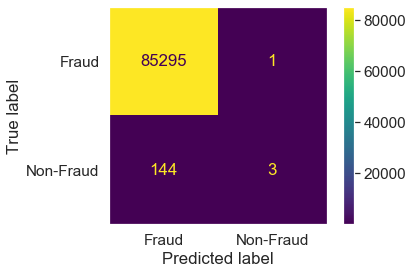

In [162]:
#Looking into accuracy, sensitivity, precision and Specificity

print('Accuracy : {:2.2}'.format(metrics.accuracy_score(y_test, y_pred)))
print('Sensitivity/Recall : {:2.2}'.format(metrics.recall_score(y_test, y_pred)))
print('Precision : {:2.2}'.format(metrics.precision_score(y_test, y_pred)))
print('F1 Score : {:2.2}'.format(metrics.f1_score(y_test, y_pred)))
print("Specificity : {:2.2}".format(TN/(TN+FP)))

# Plotting Confusion Matrics

plt.rcParams["axes.grid"] = False

metrics.plot_confusion_matrix(log_model, X_test, y_test, values_format = 'n',
                                    display_labels = ['Fraud', 'Non-Fraud'])
plt.show()

In [163]:
# Let's see the important parameters

prem = PermutationImportance(estimator = log, random_state = 0)
prem.fit(X_train, y_train)

PermutationImportance(estimator=LogisticRegression(C=10), random_state=0)

In [164]:
eli5.show_weights(estimator = prem, feature_names = X_test.columns.tolist())

Weight,Feature
0.0005 ± 0.0001,V6
0.0000 ± 0.0000,V24
0.0000 ± 0.0000,V21
-0.0000 ± 0.0000,V26
-0.0001 ± 0.0003,V28
-0.0003 ± 0.0002,V23
-0.0004 ± 0.0002,V15
-0.0005 ± 0.0001,V13
-0.0006 ± 0.0002,V20
-0.0007 ± 0.0002,scaled_amount


#### 2. Decision Tree

In [165]:
# Hyperparameter Tuning

# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(5, 200, 20),
    'min_samples_split': range(5, 200, 20),
}


# Instantiate the model
dec_tree = DecisionTreeClassifier()

dt_rsearch = RandomizedSearchCV(estimator = dec_tree, param_distributions = param_grid, refit='recall_score', 
                          cv = 3, verbose = 1, n_jobs = -1, random_state = 0)

# Fit the randomized search to the data
dt_rsearch.fit(X_train_ada, y_train_ada)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  1.0min finished


RandomizedSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=-1,
                   param_distributions={'max_depth': range(5, 15, 5),
                                        'min_samples_leaf': range(5, 200, 20),
                                        'min_samples_split': range(5, 200, 20)},
                   random_state=0, refit='recall_score', verbose=1)

In [166]:
# Looking for the best parameters

print("The best parameters to select are :\n",dt_rsearch.best_params_)

The best parameters to select are :
 {'min_samples_split': 5, 'min_samples_leaf': 145, 'max_depth': 10}


In [167]:
print("Mean cross-validated score of the best_estimator :\n",round(dt_rsearch.best_score_,2))

Mean cross-validated score of the best_estimator :
 0.92


In [168]:
# model with optimal hyperparameters
clf_gini = DecisionTreeClassifier(random_state = 0,
                                  max_depth=10, 
                                  min_samples_leaf=5,
                                  min_samples_split=145)
clf_gini.fit(X_train_ada, y_train_ada)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=5, min_samples_split=145,
                       random_state=0)

In [169]:
# accuracy score
clf_gini.score(X_test, y_test)

0.997940147232658

In [170]:
y_pred_default = clf_gini.predict(X_test)

confusion_tree_hp=confusion_matrix(y_test,y_pred_default)
confusion_tree_hp

array([[85265,    31],
       [  145,     2]], dtype=int64)

In [171]:
TP = confusion_tree_hp[1,1] # true positive 
TN = confusion_tree_hp[0,0] # true negatives
FP = confusion_tree_hp[0,1] # false positives
FN = confusion_tree_hp[1,0] # false negatives

# Let's see the sensitivity 
print('Sensitivity: ', round(TP / float(TP+FN),2))

# Let us calculate specificity
print('Specificity: ',round(TN / float(TN+FP),2))

# Calculate false postive rate -
print('False postive rate: ',round(FP/ float(TN+FP),2))

# positive predictive value 
print('Positive predictive value: ', round(TP / float(TP+FP),2))

# Negative predictive value
print('Negative predictive value: ',round(TN / float(TN+ FN),2))

## Misclassification rate

print('Misclassification Rate: ',round((FN+FP)/(TP+TN+FP+FN),2))

Sensitivity:  0.01
Specificity:  1.0
False postive rate:  0.0
Positive predictive value:  0.06
Negative predictive value:  1.0
Misclassification Rate:  0.0


In [172]:
# Let's see the important parameters

prem = PermutationImportance(estimator = clf_gini, random_state = 0)
prem.fit(X_train, y_train)

PermutationImportance(estimator=DecisionTreeClassifier(max_depth=10,
                                                       min_samples_leaf=5,
                                                       min_samples_split=145,
                                                       random_state=0),
                      random_state=0)

In [173]:
eli5.show_weights(estimator = prem, feature_names = X_test.columns.tolist())

Weight,Feature
0.0418 ± 0.0005,V1
0.0326 ± 0.0003,V28
0.0229 ± 0.0009,V14
0.0104 ± 0.0007,V8
0.0080 ± 0.0004,V3
0.0060 ± 0.0009,V11
0.0052 ± 0.0002,V2
0.0033 ± 0.0001,V5
0.0031 ± 0.0002,V18
0.0024 ± 0.0004,V12


#### 3. Random Forest

In [174]:
# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier

# Hyperparameter Tuning

# Create the parameter grid based on the results of random search 

param_grid = {'max_depth':[4,8,10],
                    'criterion':['gini','entropy'],
                    'min_samples_split':[2,3,5,7,9], 
                    'max_features':[5, 10],
                    'min_samples_leaf':[1, 10, 25, 50, 75, 100],
                    'n_estimators':[10,20,30,40,50,60,80,100,300]                    
}

# Create a based model
rf = RandomForestClassifier(class_weight='balanced')

# Instantiate the grid search model
rf_search_a = RandomizedSearchCV(estimator = rf, param_distributions = param_grid, refit='recall_score',
                          cv = 3, n_jobs = -1, verbose = 1, random_state = 0)

# Fit the randomized search to the data
rf_search_a.fit(X_train_ada, y_train_ada)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 13.3min finished


RandomizedSearchCV(cv=3,
                   estimator=RandomForestClassifier(class_weight='balanced'),
                   n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [4, 8, 10],
                                        'max_features': [5, 10],
                                        'min_samples_leaf': [1, 10, 25, 50, 75,
                                                             100],
                                        'min_samples_split': [2, 3, 5, 7, 9],
                                        'n_estimators': [10, 20, 30, 40, 50, 60,
                                                         80, 100, 300]},
                   random_state=0, refit='recall_score', verbose=1)

In [175]:
# Looking for the best parameters
print("The best parameters to select are :\n",rf_search_a.best_params_)

The best parameters to select are :
 {'n_estimators': 80, 'min_samples_split': 9, 'min_samples_leaf': 50, 'max_features': 10, 'max_depth': 8, 'criterion': 'entropy'}


In [176]:
print("Mean cross-validated score of the best_estimator :\n",round(rf_search_a.best_score_,2))

Mean cross-validated score of the best_estimator :
 0.93


In [177]:
# model with optimal hyperparameters

rfc_a = RandomForestClassifier(bootstrap=True,
                             class_weight='balanced',
                             criterion = 'entropy',
                             max_depth=8,
                             max_features=10,
                             min_samples_leaf=50,
                             min_samples_split=9,
                             n_estimators=80,
                             n_jobs = -1, random_state = 0)
# fit
rfc_a.fit(X_train_ada, y_train_ada)

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=8, max_features=10, min_samples_leaf=50,
                       min_samples_split=9, n_estimators=80, n_jobs=-1,
                       random_state=0)

In [178]:
# Accuracy score

rfc_a.score(X_test, y_test)

0.9982795547909132

In [179]:
y_pred_default_a =rfc_a.predict(X_test)

confusion_tree_rfa=confusion_matrix(y_test,y_pred_default_a)
confusion_tree_rfa

array([[85296,     0],
       [  147,     0]], dtype=int64)

In [180]:
TP = confusion_tree_rfa[1,1] # true positive 
TN = confusion_tree_rfa[0,0] # true negatives
FP = confusion_tree_rfa[0,1] # false positives
FN = confusion_tree_rfa[1,0] # false negatives

# Let's see the sensitivity 
print('Sensitivity: ', round(TP / float(TP+FN),2))

# Let us calculate specificity
print('Specificity: ',round(TN / float(TN+FP),2))

# Calculate false postive rate 
print('False postive rate: ',round(FP/ float(TN+FP),2))

# positive predictive value 
print('Positive predictive value: ', round(TP / float(TP+FP),2))

# Negative predictive value
print('Negative predictive value: ',round(TN / float(TN+ FN),2))

## Misclassification rate

print('Misclassification Rate: ',round((FN+FP)/(TP+TN+FP+FN),2))

Sensitivity:  0.0
Specificity:  1.0
False postive rate:  0.0
Positive predictive value:  nan
Negative predictive value:  1.0
Misclassification Rate:  0.0


In [181]:
# Let's see the important parameters
prem_rfa = PermutationImportance(estimator = rf_search_a, random_state = 0)
prem_rfa.fit(X_train, y_train)

PermutationImportance(estimator=RandomizedSearchCV(cv=3,
                                                   estimator=RandomForestClassifier(class_weight='balanced'),
                                                   n_jobs=-1,
                                                   param_distributions={'criterion': ['gini',
                                                                                      'entropy'],
                                                                        'max_depth': [4,
                                                                                      8,
                                                                                      10],
                                                                        'max_features': [5,
                                                                                         10],
                                                                        'min_samples_leaf': [1,
                            

In [182]:
eli5.show_weights(estimator = prem_rfa, feature_names = X_test.columns.tolist())

Weight,Feature
0.0356 ± 0.0009,V14
0.0221 ± 0.0011,V12
0.0184 ± 0.0007,V17
0.0161 ± 0.0006,V3
0.0160 ± 0.0006,V11
0.0098 ± 0.0005,V4
0.0066 ± 0.0005,V18
0.0059 ± 0.0004,V8
0.0049 ± 0.0004,V7
0.0045 ± 0.0002,V5


#### 3. GaussianNB

In [183]:
# Hyperparameter Tuning

# Create the parameter grid 
param_grid = {
        'var_smoothing': np.logspace(0,-9, num=100),
}


# Instantiate the model
gaussain_nb = GaussianNB()

gnb_rsearch = RandomizedSearchCV(estimator = gaussain_nb, param_distributions = param_grid, refit='recall_score', 
                          cv = 3, verbose = 1, n_jobs = -1, random_state = 0)

# Fit the randomized search to the data
gnb_rsearch.fit(X_train_ada, y_train_ada)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   10.5s finished


RandomizedSearchCV(cv=3, estimator=GaussianNB(), n_jobs=-1,
                   param_distributions={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5.33669923e-02, 4.32876128e-02,
       3.5111917...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])},
                   random_state=0, refit='recall_score', verbose=1)

In [184]:
# Looking for the best parameters
print("The best parameters to select are :\n",gnb_rsearch.best_params_)

The best parameters to select are :
 {'var_smoothing': 1.519911082952933e-08}


In [185]:
print("Mean cross-validated score of the best_estimator :\n",round(gnb_rsearch.best_score_,2))


Mean cross-validated score of the best_estimator :
 0.73


In [186]:
# model with optimal hyperparameters

gaussain_nb = GaussianNB(var_smoothing = 1.519)
gaussain_nb.fit(X_train_ada, y_train_ada)

GaussianNB(var_smoothing=1.519)

In [187]:
# accuracy score

gaussain_nb.score(X_test, y_test)

0.9981039991573329

In [188]:
y_pred_default = gaussain_nb.predict(X_test)

confusion_tree_hp=confusion_matrix(y_test, y_pred_default)
confusion_tree_hp

array([[85281,    15],
       [  147,     0]], dtype=int64)

In [189]:
TP = confusion_tree_hp[1,1] # true positive 
TN = confusion_tree_hp[0,0] # true negatives
FP = confusion_tree_hp[0,1] # false positives
FN = confusion_tree_hp[1,0] # false negatives

# Let's see the sensitivity 
print('Sensitivity: ', round(TP / float(TP+FN),2))

# Let us calculate specificity
print('Specificity: ',round(TN / float(TN+FP),2))

# Calculate false postive rate -
print('False postive rate: ',round(FP/ float(TN+FP),2))

# positive predictive value 
print('Positive predictive value: ', round(TP / float(TP+FP),2))

# Negative predictive value
print('Negative predictive value: ',round(TN / float(TN+ FN),2))

## Misclassification rate

print('Misclassification Rate: ',round((FN+FP)/(TP+TN+FP+FN),2))

Sensitivity:  0.0
Specificity:  1.0
False postive rate:  0.0
Positive predictive value:  0.0
Negative predictive value:  1.0
Misclassification Rate:  0.0


In [190]:
# Let's see the important parameters

prem = PermutationImportance(estimator = gaussain_nb, random_state = 0)
prem.fit(X_train, y_train)

PermutationImportance(estimator=GaussianNB(var_smoothing=1.519), random_state=0)

In [191]:
eli5.show_weights(estimator = prem, feature_names = X_test.columns.tolist())

Weight,Feature
0.0028 ± 0.0002,V8
0.0026 ± 0.0004,V7
0.0019 ± 0.0002,V2
0.0015 ± 0.0003,V12
0.0013 ± 0.0001,V21
0.0012 ± 0.0001,V5
0.0012 ± 0.0002,V27
0.0011 ± 0.0003,V6
0.0010 ± 0.0001,V14
0.0009 ± 0.0002,V10


### Step 8. Conclusion

1) Decision Tree and GaussianNB, Random forest models gave good results with class imbalance dataset.

2) With Random Oversampling:-
- Logistic Regression is the best model with AUC = 0.98, recall = 91% and precision = 6.1% than other models. 
- Decision Tree and Random Forest Classifier performance is also good.
- GaussianNB not performed well..

3) With Smote method:-
- Random Forest Classifier has Accuracy= 0.99, recall score=84% performed nicely.
- Logistic Regresssion, Decision Tree and GaussianNB not performed well.

4) With Adasyn balanced data we didn't get good results with any model though accuracy is 99%.

5) Therefore, I would like to conclude that Random Forest Classifier gives a better prediction over other models.